In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')  # Make sure the file is in the same folder
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [4]:
# Split dataset into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find the best k value
error_rate = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rate.append(error)


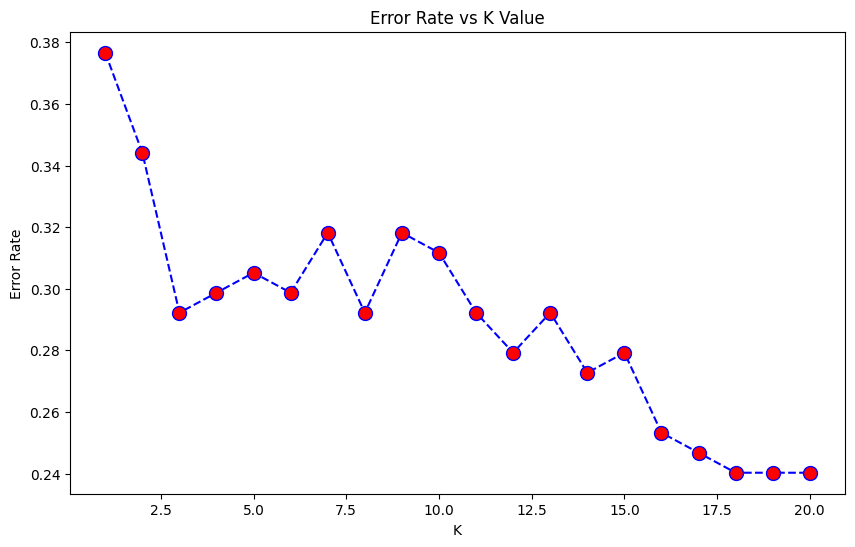

In [5]:
# Plot error rate vs k
plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [6]:
# Choose the best k (lowest error rate)
best_k = error_rate.index(min(error_rate)) + 1
print(f"Best K Value: {best_k}")

# Train KNN with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Best K Value: 18


In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[88 11]
 [26 29]]


In [8]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.7597402597402597


In [9]:
# Error Rate
err_rate = 1 - accuracy
print("Error Rate:", err_rate)

Error Rate: 0.24025974025974028


In [10]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.725


In [11]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.5272727272727272
